In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt

In [118]:
# Read the csv file into dataframe
df1 = pd.read_csv("df1990-1999.csv")
df1.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000


In [119]:
df1.shape

(287196, 10)

In [120]:
# Read the csv file into dataframe
df2 = pd.read_csv("df2000-2012.csv")
df2.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
5,2000-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,157000.0
6,2000-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,178000.0
7,2000-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,160000.0
8,2000-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,169000.0
9,2000-01,ANG MO KIO,3 ROOM,332,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1981,205000.0


In [121]:
df2.shape

(369651, 10)

In [122]:
df3 = pd.read_csv("df2012-2014.csv")
df3.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
5,2012-03,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,321000.0
6,2012-03,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,323000.0
7,2012-03,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,325000.0
8,2012-03,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979,328000.0
9,2012-03,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1985,330000.0


In [123]:
df4 = pd.read_csv("df2015-2016.csv")
df4.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,64,290000.0
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,68.0,New Generation,1980,64,290000.0
7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,65,293000.0
8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,62,300000.0
9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,13 TO 15,68.0,New Generation,1985,69,307500.0


In [124]:
df5 = pd.read_csv("df2017.csv")
df5.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [125]:
df5.shape

(174351, 11)

In [126]:
#  Extract the numeric part of 'remaining_lease', split by space, and convert to integer

df5['remaining_lease'] = df5['remaining_lease'].astype(str).str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])



0         61
1         60
2         62
3         62
4         62
          ..
174346    60
174347    93
174348    62
174349    62
174350    62
Name: remaining_lease, Length: 174351, dtype: int64


In [127]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [128]:
df_combined.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN


# Feature engineering 

Feature engineering
Since the 'month' column contains both month and year, we split the column into 'month' and 'year'.

In [129]:
# Split 'month' into 'year' and 'month' columns
df_combined[['year', 'month']] = df_combined['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
df_combined['year'] = pd.to_numeric(df_combined['year'])
df_combined['month'] = pd.to_numeric(df_combined['month'])

In [130]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920549,3,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0,60.0,2024
920550,3,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0,93.0,2024
920551,3,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.0,2024
920552,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0,2024


The first 3 datasets did not have the column 'remaining lease' and thus when we merged all 5 datasets together we have Nan values on those rows. We use the below formula to obtain the values for those Nan values. 
remaining lease = 99 - (Year - lease commence date)

In [131]:
# Calculate remaining lease for rows with NaN values
df_combined['remaining_lease'].fillna(99 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)

In [132]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920549,3,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0,60.0,2024
920550,3,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0,93.0,2024
920551,3,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.0,2024
920552,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0,2024


Now we check if there are any repetitions in the categorical values. And by doing so, we found out that there were indeed some in the columns 'flat_model' and 'flat_type', which can be simply resolved by mapping and changing the case of the characters.

In [133]:
# Changing the case to uppercase for consistency
df_combined['flat_model'] = df_combined['flat_model'].str.upper()

In [134]:
# Convert 'flat_type' values to lowercase
df_combined['flat_type'] = df_combined['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

df_combined['flat_type'] = df_combined['flat_type'].map(type_mapping)

# Changing the case to Uppercase
df_combined['flat_type'] = df_combined['flat_type'].str.upper()

In [135]:
df_combined.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year
count,920554.000000,920554.000000,920554.000000,9.205540e+05,920554.000000,920554.000000
mean,6.567765,95.695257,1988.205606,3.187701e+05,81.063690,2006.040558
std,3.419174,25.837642,10.589613,1.687090e+05,10.726154,9.230403
min,1.000000,28.000000,1966.000000,5.000000e+03,41.000000,1990.000000
25%,4.000000,73.000000,1981.000000,1.920000e+05,74.000000,1999.000000
50%,7.000000,93.000000,1986.000000,2.950000e+05,83.000000,2005.000000
75%,10.000000,113.000000,1996.000000,4.150000e+05,90.000000,2013.000000
max,12.000000,307.000000,2022.000000,1.568888e+06,101.000000,2024.000000


In [136]:
df_combined.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

In [137]:
# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['remaining_lease']>99

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]

In [138]:
import pandas as pd

# Split the 'storey_range' column into 'lower_bound' and 'upper_bound'
df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# Convert 'lower_bound' and 'upper_bound' to numeric
df_combined.loc[:, 'lower_bound'] = pd.to_numeric(df_combined['lower_bound'])
df_combined.loc[:, 'upper_bound'] = pd.to_numeric(df_combined['upper_bound'])

# Now you can use df_combined with the modified columns
# For example:
df_combined.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6


In [139]:
# import statistics

# def get_median(x):
#     split_list = x.split(' TO ')
#     float_list = [float(i) for i in split_list]
#     median = statistics.median(float_list)
#     return median

# df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
# df

In [140]:
import pandas as pd

# Assuming df_combined is your DataFrame
# Adding a new column 'price_per_sqm'
df_combined['price_per_sqm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']

# Adding a new column 'years_holding'
df_combined['years_holding'] = df_combined['year'] - df_combined['lease_commence_date']

# Adding a new column 'current_remaining_lease'
df_combined['remaining_lease_asof2024'] = df_combined['remaining_lease'] - (2024 - df_combined['year'])

# Now the modifications are performed using .loc to avoid the SettingWithCopyWarning


In [141]:
df_combined.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'lower_bound', 'upper_bound',
       'price_per_sqm', 'years_holding', 'remaining_lease_asof2024'],
      dtype='object')

In [142]:
# Save it to a csv file 
df_combined = df_combined.reset_index(drop=True)
df_combined.to_csv('Singapore_resale_flat_prices_updated.csv', index=False)


# Exploratory Data Analysis

In [143]:
df=pd.read_csv('Singapore_resale_flat_prices_updated.csv')

In [144]:
df_scope=df[['floor_area_sqm','resale_price','price_per_sqm','years_holding','remaining_lease_asof2024']]
df_scope

,floor_area_sqm,resale_price,price_per_sqm,years_holding,remaining_lease_asof2024
0,31.0,9000.0,290.322581,13,52.0
1,31.0,6000.0,193.548387,13,52.0
2,31.0,8000.0,258.064516,13,52.0
3,31.0,6000.0,193.548387,13,52.0
4,73.0,47200.0,646.575342,14,51.0
...,...,...,...,...,...
920498,126.0,610000.0,4841.269841,39,60.0
920499,113.0,665000.0,5884.955752,6,93.0
920500,121.0,680000.0,5619.834711,37,62.0
920501,146.0,851888.0,5834.849315,37,62.0


In [145]:
df_scope = df_scope.drop_duplicates()

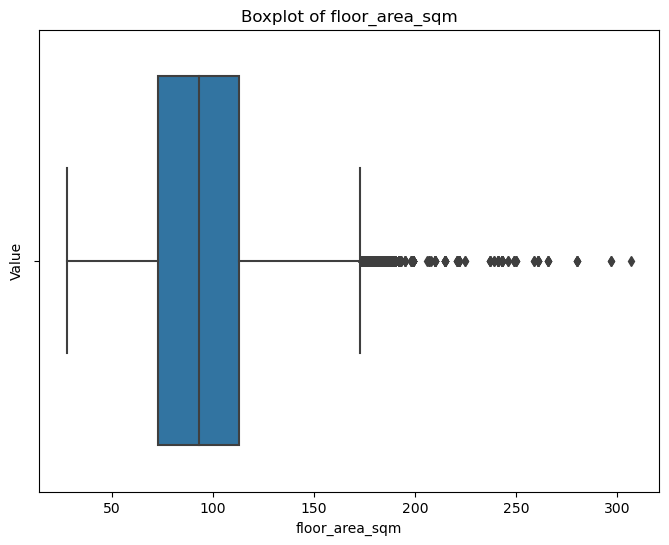

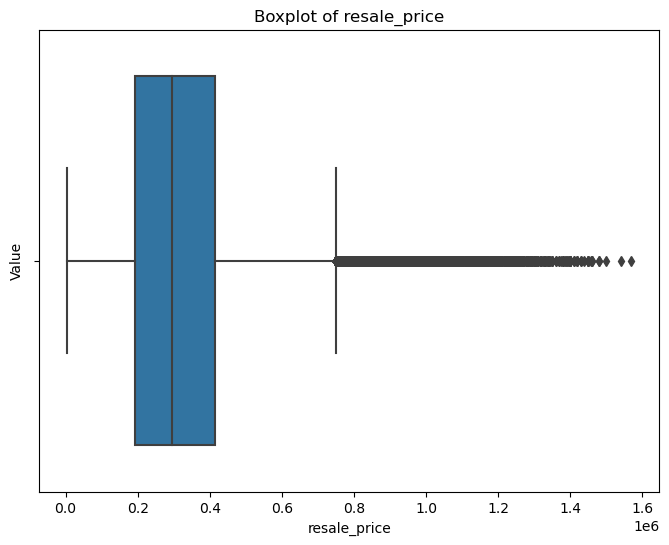

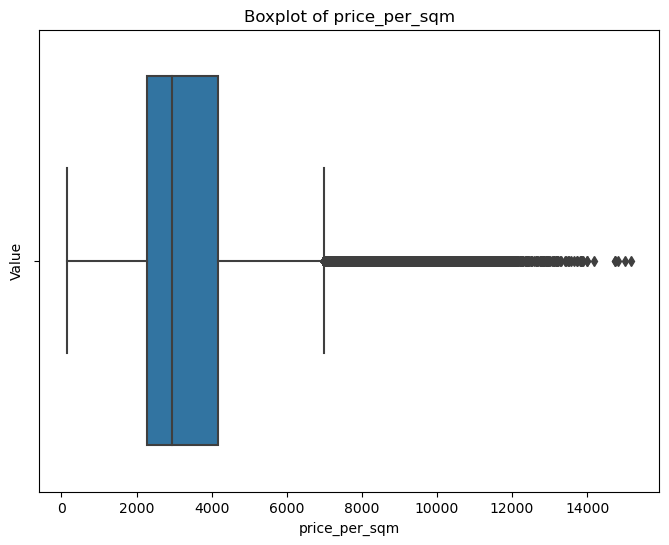

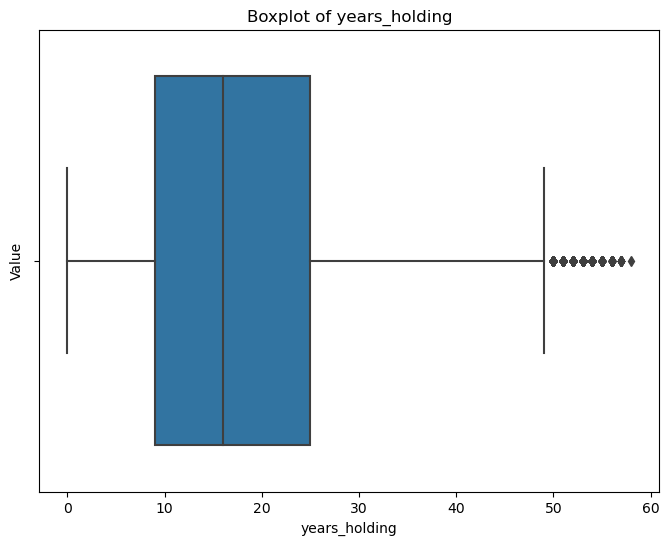

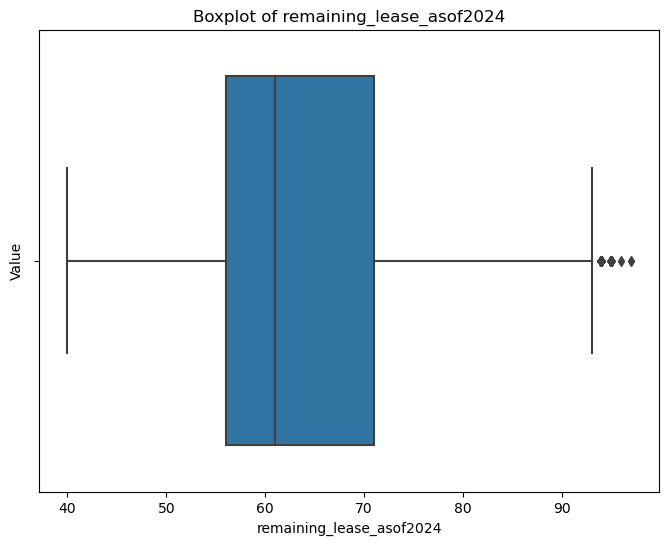

In [146]:
col = ['floor_area_sqm','resale_price','price_per_sqm','years_holding','remaining_lease_asof2024']
# df[i] = pd.to_numeric(df[i], errors='coerce')  # Convert to numeric, handle errors

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)  # Use x argument instead of y
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)  # Set x-axis label to the variable name
    plt.ylabel('Value')  # Set y-axis label
    plt.show()  # Display the plot


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920503 entries, 0 to 920502
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     920503 non-null  int64  
 1   town                      920503 non-null  object 
 2   flat_type                 920503 non-null  object 
 3   block                     920503 non-null  object 
 4   street_name               920503 non-null  object 
 5   storey_range              920503 non-null  object 
 6   floor_area_sqm            920503 non-null  float64
 7   flat_model                920503 non-null  object 
 8   lease_commence_date       920503 non-null  int64  
 9   resale_price              920503 non-null  float64
 10  remaining_lease           920503 non-null  float64
 11  year                      920503 non-null  int64  
 12  lower_bound               920503 non-null  int64  
 13  upper_bound               920503 non-null  i

In [148]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,remaining_lease_asof2024
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0


In [149]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease             0
year                        0
lower_bound                 0
upper_bound                 0
price_per_sqm               0
years_holding               0
remaining_lease_asof2024    0
dtype: int64

Using Univariate and Bivariate analysis we obtain deeper insights. 

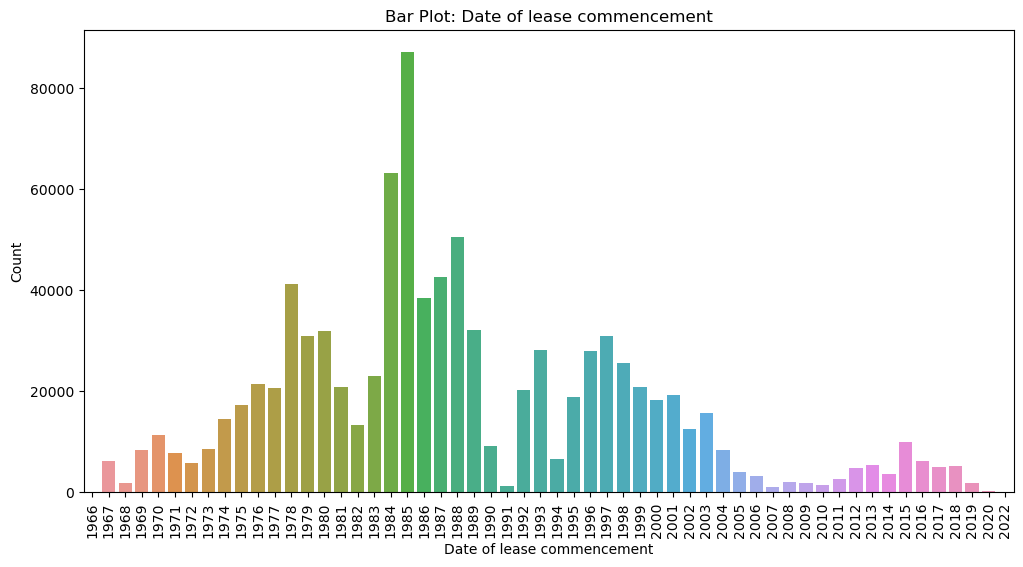

In [150]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

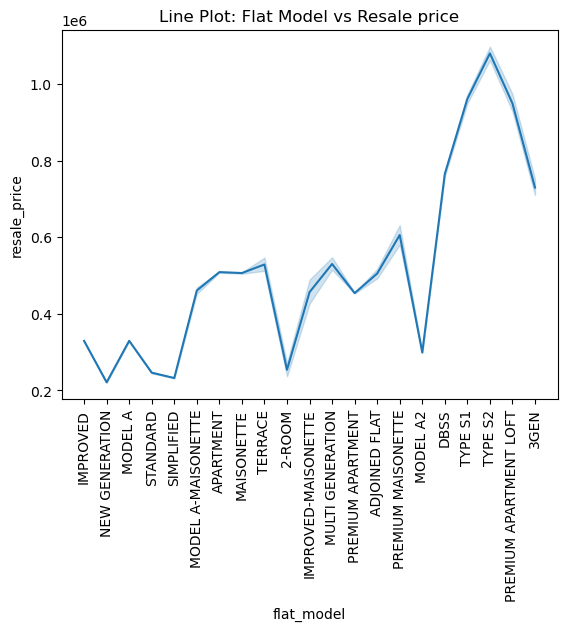

In [151]:
# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

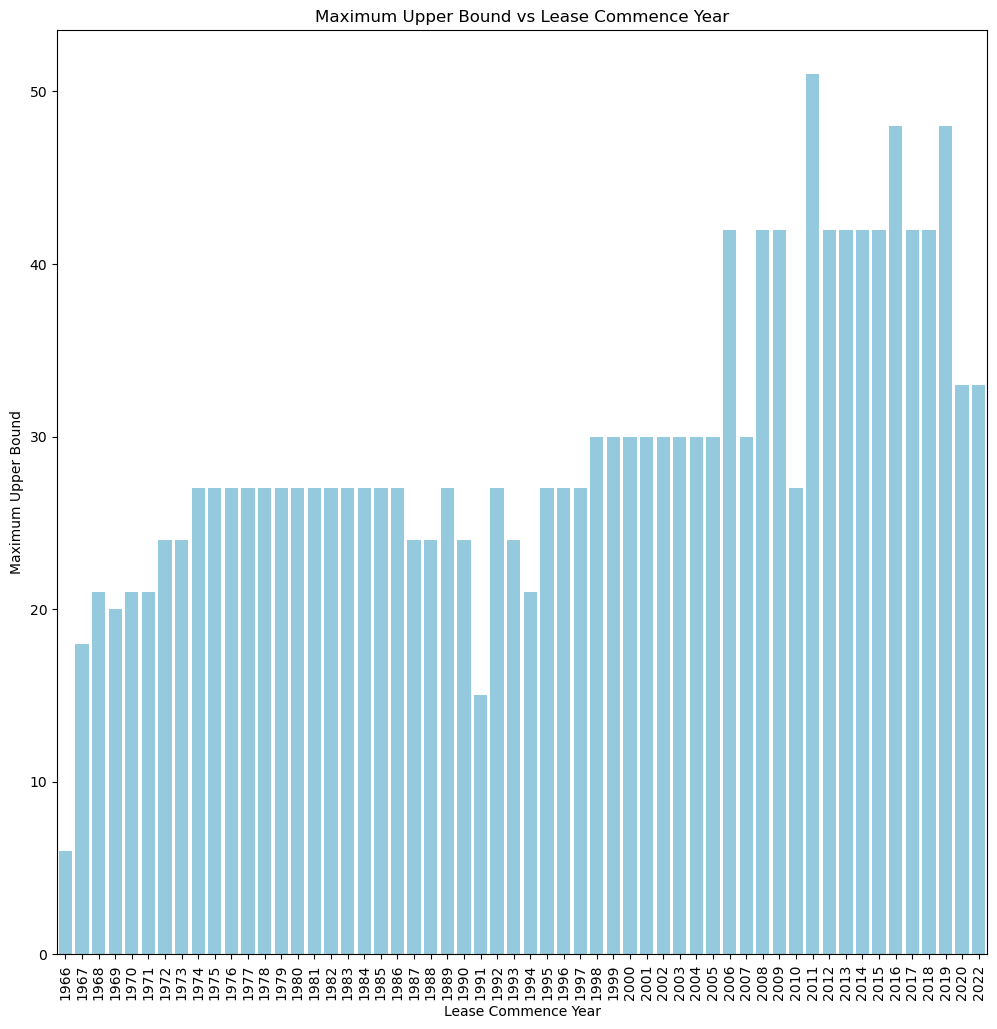

In [152]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='skyblue')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()


# Model Building and Evaluation

In [153]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date','remaining_lease_asof2024', 'years_holding', 'resale_price']
df1 = df[selected_columns]

# Separate features (X) and target variable (y)
X = df1.drop('resale_price', axis=1)
y = df1['resale_price']

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['town']])
X1 = ohe.fit_transform(X[['town']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['flat_type']])
X2 = ohe2.fit_transform(X[['flat_type']]).toarray()
ohe3 = OneHotEncoder(handle_unknown='ignore')
ohe3.fit(X[['flat_model']])
X3 = ohe3.fit_transform(X[['flat_model']]).toarray()
ohe4 = OneHotEncoder(handle_unknown='ignore')
ohe4.fit(X[['storey_range']])
X4 = ohe4.fit_transform(X[['storey_range']]).toarray()
# independent features after encoding
X = np.concatenate((X[['year','floor_area_sqm','lease_commence_date','years_holding','remaining_lease_asof2024']].values, X1, X2, X3, X4), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(644352, 85)
(276151, 85)
(644352,)
(276151,)


In [155]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)
print(Lr.score(X_train, y_train))
print(Lr.score(X_test,y_test))

0.8386129107179369
-4.8026881183165436e+23


In [156]:
y_pred = Lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

314812705334094.8
1.368425401967293e+34
1.169797162745445e+17
-4.8026881183165436e+23


In [157]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50,random_state = 42)
rf.fit(X_train, y_train)

# Print R-squared scores
print( rf.score(X_train, y_train))
print( rf.score(X_test, y_test))

0.9904577058642172
0.9745923552643468


In [158]:
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

18582.7497377922
723937628.34251
26906.089056986897
0.9745923552643468


In [159]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
print(DTR.score(X_train, y_train))
print(DTR.score(X_test,y_test))

0.9922142729061133
0.9654551396191906


In [160]:
y_pred = DTR.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

20870.416035595565
984283453.0984112
31373.29203476121
0.9654551396191906


In [161]:
#(X[['year','floor_area_sqm','lease_commence_date','years_holding','current_remaining_lease']].values, X1, X2, X3, X4)
new_sample = np.array([[1990, 50.0,1966,13,50.0,'ANG MO KIO','1 ROOM','IMPROVED','10 TO 12']])
new_sample_town = ohe.transform(new_sample[:, [5]]).toarray()
new_sample_flat_type = ohe2.transform(new_sample[:, [6]]).toarray()
new_sample_flat_model = ohe3.transform(new_sample[:, [7]]).toarray()
new_sample_storey_range = ohe4.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4]],new_sample_town,new_sample_flat_type,new_sample_flat_model,new_sample_storey_range ), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = DTR.predict(new_sample1)
print('Predicted selling price:',new_pred)

Predicted selling price: [8200.]


In [162]:
import pickle
with open('model_DTR.pkl','wb') as file:
    pickle.dump(DTR,file)
with open('scaler_DTR.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('ohe.pkl','wb') as file:
    pickle.dump(ohe,file)
with open('ohe2.pkl','wb') as file:
    pickle.dump(ohe2,file)
with open('ohe3.pkl','wb') as file:
    pickle.dump(ohe3,file)
with open('ohe4.pkl','wb') as file:
    pickle.dump(ohe4,file)